# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After you complete your visualizations, you'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Your slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing! Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


## Step 2

Let's load the datasets and inspect them.

Load **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspect the DataFrame using `print()`.

Hint: Use the `pd.read_csv()`function).

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [2]:
nflx = pd.read_csv('NFLX.csv')
nflx.rename(columns= {
                        'Date' : 'date',
                        'Open' : 'open',
                         'High' : 'high',
                        'Low'   : 'low',
                        'Close' : 'close',
                         'Adj Close' : 'price',
                        'Volume' : 'vol'
                        }, inplace=True)
print(nflx)

         date        open        high         low       close       price  \
0    1/1/2017  124.959999  143.460007  124.309998  140.710007  140.710007   
1    2/1/2017  141.199997  145.949997  139.050003  142.130005  142.130005   
2    3/1/2017  142.839996  148.289993  138.259995  147.809998  147.809998   
3    4/1/2017  146.699997  153.520004  138.660004  152.199997  152.199997   
4    5/1/2017  151.910004  164.750000  151.610001  163.070007  163.070007   
5    6/1/2017  163.520004  166.869995  147.300003  149.410004  149.410004   
6    7/1/2017  149.800003  191.500000  144.250000  181.660004  181.660004   
7    8/1/2017  182.490005  184.619995  164.229996  174.710007  174.710007   
8    9/1/2017  175.550003  189.949997  172.440002  181.350006  181.350006   
9   10/1/2017  182.110001  204.380005  176.580002  196.429993  196.429993   
10  11/1/2017  197.240005  202.479996  184.320007  195.509995  195.509995   
11  12/1/2017  186.990005  194.490005  178.380005  191.960007  191.960007   

Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect the DataFrame using `print()`.

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [3]:
djia = pd.read_csv('DJI.csv')
djia.rename(columns= {
                        'Date' : 'date',
                        'Open' : 'open',
                         'High' : 'high',
                        'Low'   : 'low',
                        'Close' : 'close',
                         'Adj Close' : 'price',
                        'Volume' : 'vol'
                        }, inplace=True)
print(djia)

          date          open          high           low         close  \
0   2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1   2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2   2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3   2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4   2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   
5   2017-06-01  21030.550781  21535.029297  20994.220703  21349.630859   
6   2017-07-01  21392.300781  21929.800781  21279.300781  21891.119141   
7   2017-08-01  21961.419922  22179.109375  21600.339844  21948.099609   
8   2017-09-01  21981.769531  22419.509766  21709.630859  22405.089844   
9   2017-10-01  22423.470703  23485.250000  22416.000000  23377.240234   
10  2017-11-01  23442.900391  24327.820313  23242.750000  24272.349609   
11  2017-12-01  24305.400391  24876.070313  23921.900391  24719.220703   

           price         vol  
0   19

Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [4]:
nflx_q = pd.read_csv('NFLX_daily_by_quarter.csv')
nflx_q.rename(columns= {
                        'Date' : 'date',
                        'Open' : 'open',
                         'High' : 'high',
                        'Low'   : 'low',
                        'Close' : 'close',
                         'Adj Close' : 'price',
                        'Volume' : 'vol'
                        }, inplace=True)
print(nflx_q.groupby('Quarter').open.count())
print(nflx)
print(djia.head(25))

Quarter
Q1    62
Q2    63
Q3    63
Q4    63
Name: open, dtype: int64
         date        open        high         low       close       price  \
0    1/1/2017  124.959999  143.460007  124.309998  140.710007  140.710007   
1    2/1/2017  141.199997  145.949997  139.050003  142.130005  142.130005   
2    3/1/2017  142.839996  148.289993  138.259995  147.809998  147.809998   
3    4/1/2017  146.699997  153.520004  138.660004  152.199997  152.199997   
4    5/1/2017  151.910004  164.750000  151.610001  163.070007  163.070007   
5    6/1/2017  163.520004  166.869995  147.300003  149.410004  149.410004   
6    7/1/2017  149.800003  191.500000  144.250000  181.660004  181.660004   
7    8/1/2017  182.490005  184.619995  164.229996  174.710007  174.710007   
8    9/1/2017  175.550003  189.949997  172.440002  181.350006  181.350006   
9   10/1/2017  182.110001  204.380005  176.580002  196.429993  196.429993   
10  11/1/2017  197.240005  202.479996  184.320007  195.509995  195.509995   
11  12/

## Step 3

Let's learn more about our data. The datasets are large and it may be easier to view the entire dataset locally on your computer. Open the CSV files directly from the folder you downloaded for this project.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 
 
Answer the following questions by inspecting the data in the **NFLX.csv**,**DJI.csv**, and **NFLX_daily_by_quarter.csv** in your computer.

What year is represented in the data? Look out for the latest and earliest date.

In [5]:
print(nflx_q.date[:100])

0     2017-01-03
1     2017-01-04
2     2017-01-05
3     2017-01-06
4     2017-01-09
         ...    
95    2017-05-19
96    2017-05-22
97    2017-05-23
98    2017-05-24
99    2017-05-25
Name: date, Length: 100, dtype: object


+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [6]:
'''Trading Days.
nflx_q has daily data and also the quarter it falls in compared to DJIA.
netflix_stocks & DJIA has only monthly stock values(beginning).'''

'Trading Days.\nnflx_q has daily data and also the quarter it falls in compared to DJIA.\nnetflix_stocks & DJIA has only monthly stock values(beginning).'

## Step 4

Great! Now that we have spent sometime looking at the data, let's look at the column names of the DataFrame `netflix_stocks` using `.head()`. 

In [7]:
print(nflx.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12 non-null     object 
 1   open    12 non-null     float64
 2   high    12 non-null     float64
 3   low     12 non-null     float64
 4   close   12 non-null     float64
 5   price   12 non-null     float64
 6   vol     12 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 800.0+ bytes
None


What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. Remember to use `inplace=True`.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.
Hint: Use [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)).


In [8]:
#done already

Run `netflix_stocks.head()` again to check your column name has changed.

In [9]:
print(nflx.head())

       date        open        high         low       close       price  \
0  1/1/2017  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2/1/2017  141.199997  145.949997  139.050003  142.130005  142.130005   
2  3/1/2017  142.839996  148.289993  138.259995  147.809998  147.809998   
3  4/1/2017  146.699997  153.520004  138.660004  152.199997  152.199997   
4  5/1/2017  151.910004  164.750000  151.610001  163.070007  163.070007   

         vol  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Call `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [10]:
print(djia.info())
print(nflx_q.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12 non-null     object 
 1   open    12 non-null     float64
 2   high    12 non-null     float64
 3   low     12 non-null     float64
 4   close   12 non-null     float64
 5   price   12 non-null     float64
 6   vol     12 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 800.0+ bytes
None
         date        open        high         low       close       price  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

        vol Quarter  
0   9437

## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


1. Start by creating a variable `ax` and setting it equal to `sns.violinplot()`. This will instantiate a figure and give us access to the axes through the variable name `ax`.
2. Use `sns.violinplot()` and pass in the following arguments:
+ The `Quarter` column as the `x` values
+ The `Price` column as your `y` values
+ The `netflix_stocks_quarterly` dataframe as your `data`
3. Improve the readability of the chart by adding a title of the plot. Add `"Distribution of 2017 Netflix Stock Prices by Quarter"` by using `ax.set_title()`
4. Change your `ylabel` to "Closing Stock Price"
5. Change your `xlabel` to "Business Quarters in 2017"
6. Be sure to show your plot!


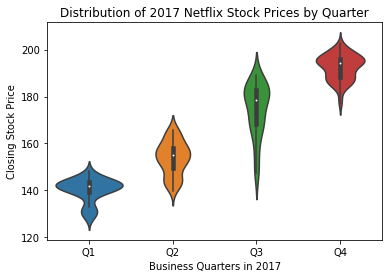

<Figure size 432x288 with 0 Axes>

In [11]:
ax = sns.violinplot(data = nflx_q, x='Quarter', y= 'price')
ax.set_title('Distribution of 2017 Netflix Stock Prices by Quarter')
ax.set_ylabel('Closing Stock Price')
ax.set_xlabel('Business Quarters in 2017')

plt.show()
plt.savefig('StockPrice_Dist.png')


## Graph Literacy
- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

1. Plot the actual EPS by using `x_positions` and `earnings_actual` with the `plt.scatter()` function. Assign `red` as the color.
2. Plot the actual EPS by using `x_positions` and `earnings_estimate` with the `plt.scatter()` function. Assign `blue` as the color

3. Often, estimates and actual EPS are the same. To account for this, be sure to set your transparency  `alpha=0.5` to allow for visibility pf overlapping datapoint.
4. Add a legend by using `plt.legend()` and passing in a list with two strings `["Actual", "Estimate"]`

5. Change the `x_ticks` label to reflect each quarter by using `plt.xticks(x_positions, chart_labels)`
6. Assing "`"Earnings Per Share in Cents"` as the title of your plot.


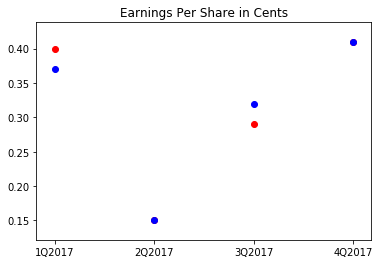

In [12]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

ax = plt.scatter(x_positions,earnings_actual,color='red')
ax1 = plt.scatter(x_positions,earnings_estimate, color='blue')

plt.xticks(x_positions,chart_labels)

plt.title('Earnings Per Share in Cents')

plt.savefig('EPS_in_cents.png')

## Graph Literacy

+ What do the purple dots tell us about the actual and estimate earnings per share in this graph? Hint: In color theory red and blue mix to make purple.


## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. We have pasted the starter code for that exercise below. 

1. Fill in the `n`, `t`, `d`, `w` values for the revenue bars
2. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `revenue_by_quarter` data
3. Fill in the `n`, `t`, `d`, `w` values for the earnings bars
4. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `earnings_by_quarter` data
5. Create a legend for your bar chart with the `labels` provided
6. Add a descriptive title for your chart with `plt.title()`
7. Add labels to each quarter by assigning the position of the ticks through the code provided. Hint:  `plt.xticks(middle_x, quarter_labels)`
8. Be sure to show your plot!


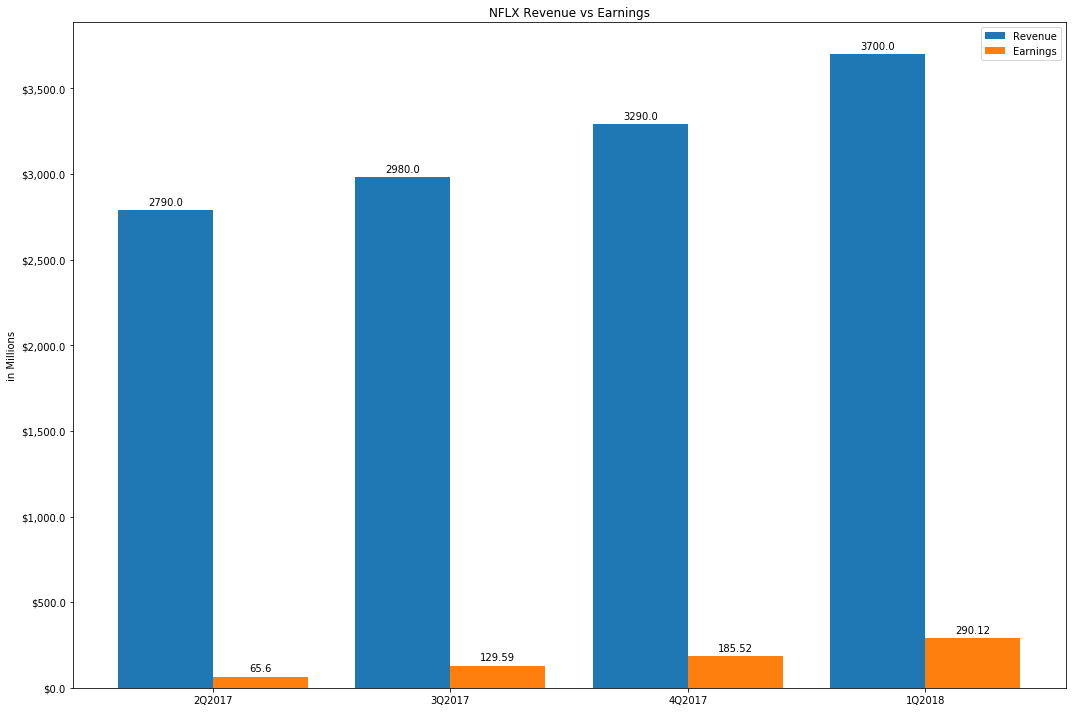

In [13]:
import matplotlib.ticker as mtick

#$ for Y axis
f, ax = plt.subplots(figsize=(15, 10))

fmt = '${x:,.1f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
revenue_by_quarter_mil = [round((1000*i),2) for i in revenue_by_quarter]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
earnings_by_quarter_mil = [(round(1000*i,2)) for i in earnings_by_quarter]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]



# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]





middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

revenue = ax.bar(bars1_x,revenue_by_quarter_mil)
ear = ax.bar(bars2_x,earnings_by_quarter_mil)
plt.ylabel("in Millions")
plt.legend(labels)
plt.xticks(middle_x,quarter_labels)
plt.title('NFLX Revenue vs Earnings')

def autolabel(moolah):
    """Attach a text label above each bar, displaying its height."""
    for benji in moolah:
        height = benji.get_height()
        ax.annotate('{}'.format(height),
                    xy=(benji.get_x() + benji.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(revenue)
autolabel(ear)

f.tight_layout()
plt.savefig('Revenue vs Earnings.png')


## Graph Literacy
What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

In [15]:
#continously increasing from ~3% to ~8%

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.
- We have set up the code for you on line 1 in the cell below. Complete the figure by passing the following arguments to `plt.subplots()` for the first plot, and tweaking the third argument for the second plot
    - `1`-- the number of rows for the subplots
    - `2` -- the number of columns for the subplots
    - `1` -- the subplot you are modifying

- Chart the Netflix Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`netflix_stocks['Date'], netflix_stocks['Price']`)
- Assign "Netflix" as a title to this subplot. Hint: `ax1.set_title()`
- For each subplot, `set_xlabel` to `"Date"` and `set_ylabel` to `"Stock Price"`
- Chart the Dow Jones Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`dowjones_stocks['Date'], dowjones_stocks['Price']`)
- Assign "Dow Jones" as a title to this subplot. Hint: `plt.set_title()`
- There is some crowding in the Y axis labels, add some space by calling `plt.subplots_adjust(wspace=.5)`
- Be sure to `.show()` your plots.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12 non-null     object 
 1   open    12 non-null     float64
 2   high    12 non-null     float64
 3   low     12 non-null     float64
 4   close   12 non-null     float64
 5   price   12 non-null     float64
 6   vol     12 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 800.0+ bytes
None


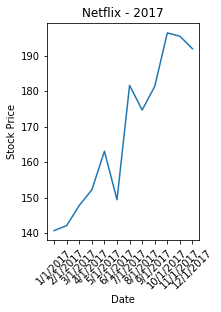

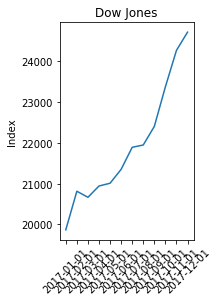

In [44]:
print(djia.info())

# Left plot Netflix
ax1 = plt.subplot(1,2,1)
ax1.plot(nflx['date'],nflx['price'], label = 'Netflix')
ax1.set_xticklabels(nflx['date'],rotation = 45)
ax1.set_title('Netflix - 2017')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
#plt.legend()
plt.show()





# Right plot Dow Jones
ax1 = plt.subplot(1,2,2)
ax1.plot(djia['date'],djia['price'])
ax1.set_title('Dow Jones')
ax1.set_ylabel('Index')
ax1.set_xticklabels(djia['date'],rotation=45)
plt.subplots_adjust(wspace = 0.5)

plt.savefig('DJIA vs NFLX.png')



- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
- Which was more volatile?
- How do the prices of the stocks compare?

# Step 9

It's time to make your presentation! Save each of your visualizations as a png file with `plt.savefig("filename.png")`.

As you prepare your slides, think about the answers to the graph literacy questions. Embed your observations in the narrative of your slideshow!

Remember that your slideshow must include:
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017
